# 1. Random Number Generation

# 2. Monte-Carlo Integration

In [2]:
import numpy as np

x=np.random.rand(1000)
gx=np.exp(-x**2)
Egx=np.mean(gx)
print(Egx)

0.7366821672313836


In [3]:
import numpy as np
a=1
b=2

x=np.random.rand(1000)
y=a+(b-a)*x
fy= np.exp(-y)/(-y)
gx=fy*(b-a)
np.mean(gx)

-0.17653821546201576

In [4]:
b=-2
x=np.random.rand(10000)

y= 1-1/x+b

fy=1/(2*np.pi)**0.5*np.exp(-y**2/2)

gx= fy/x**2
Egx=np.mean(gx)
Egx

0.02271446254545519

# 3. CI for MC integration

In [5]:
import numpy as np
import scipy.stats as spst
#z score corresponidng to alpha=0.05
alpha=0.05
z=spst.norm.ppf(1-alpha/2)
#t score corresponding to alpha=0.05, df=n-1
alpha=0.05
N=1000
t=spst.t.ppf(1-alpha/2, N-1)

x=np.random.rand(N)
Ex=np.mean(x)

Sx=np.std(x,ddof=1)
lower=Ex-t*Sx/N**0.5
upper=Ex+t*Sx/N**0.5
print(Ex, lower, upper)


0.5051457916302898 0.48727031779153834 0.5230212654690414


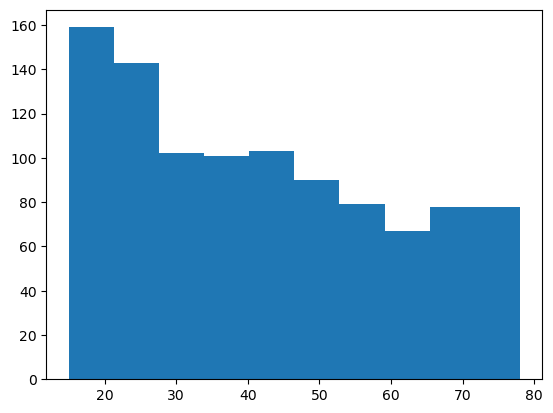

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spst

a=2
b=5
x=np.random.rand(1000)
y=a+(b-a)*x
fy=y**2+1
gx=fy*(b-a)
np.mean(gx)

Egx=np.mean(gx)
Sgx=np.std(gx,ddof=1)
alpha=1-0.95
n=1000
t_score=spst.t.ppf(1-alpha/2,n-1)
lower=Egx-t_score*Sgx/n**0.5
upper=Egx+t_score*Sgx/n**0.5
Egx,lower,upper

plt.hist(gx)
plt.show()

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

samples=np.array([4.09381763, 2.65872875, 4.04432297, 4.53562519, 2.82451183,
       3.44795033, 3.84362787, 3.06327367, 4.41016141, 4.23615092,
       4.31099231, 2.88266829, 3.40580776, 4.87834106, 3.1534833 ,
       3.88553668, 4.42238788, 3.95009911, 4.1609221 , 3.05585004,
       4.8516    , 3.25365862, 3.28653173, 3.79448807, 4.30307184,
       4.90993885, 2.74233207, 2.64869356, 4.42737186, 4.69741972,
       3.9320332 , 4.51134277, 2.54048227, 2.17835181, 2.45714751,
       2.60268216, 3.79839514, 2.85107308, 4.25537928, 4.02905383,
       3.16834397, 4.7219456 , 3.76457304, 2.53564069, 4.58406442,
       2.46154627, 2.52945601, 2.44023786, 2.25296222, 2.36682662,
       2.37126888, 4.22722042, 4.20470724, 3.40938084, 4.09316731,
       2.32803819, 2.86885985, 3.45162704, 3.94267109, 3.13174694,
       4.44758984, 2.09745664, 2.16833983, 2.04747746, 2.01796814,
       3.10328791, 4.80267512, 3.22776964, 4.3630048 , 3.15251581,
       4.88929482, 3.50086348, 3.98580078, 4.47958572, 3.09606506,
       2.29879769, 4.01003712, 2.15682715, 4.02041993, 2.71029954,
       2.92047479, 2.69683308, 2.99638511, 3.30984257, 3.03428104,
       4.14241644, 2.18520667, 4.45673865, 4.11428838, 3.17739115,
       4.16302988, 2.68082517, 4.82832235, 4.80754078, 3.70355058,
       3.77880504, 3.64338773, 3.83416659, 4.84433068, 4.89601223,
       3.26112914, 4.98655127, 3.8610798 , 2.13002008, 4.63333305,
       3.60476595, 2.33067459, 3.94400042, 3.17230014, 3.19444908,
       2.42847881, 4.81393333, 4.66451582, 3.58672317, 2.43563843,
       3.63794286, 3.7110165 , 2.90126506, 3.90167592, 2.8392242 ,
       4.22912051, 2.12609233, 4.88094686, 4.30228819, 4.41452517,
       2.98164531, 4.58552616, 3.52378319, 3.56146972, 3.20144991,
       3.98089483, 2.87425794, 4.12768017, 4.29046301, 4.49441099,
       2.42137366, 2.3530415 , 2.43928769, 3.26663572, 4.20756501,
       4.291307  , 3.08905885, 2.45737671, 2.42120718, 4.48262159,
       4.68767893, 3.78142121, 2.50334803, 4.47644791, 3.98036321,
       2.24136637, 4.23892   , 3.76086356, 2.00218997, 4.28980222,
       2.66661787, 3.57134928, 3.18685725, 4.76214827, 3.43079222,
       4.39922871, 3.08071074, 4.79466125, 4.76877316, 2.78089289,
       3.32414575, 3.21928727, 2.85880199, 2.97737327, 3.26637516,
       4.74101537, 4.90867434, 3.59621212, 2.15591751, 3.65707991,
       3.59403341, 4.88700584, 3.17410282, 4.42973059, 3.92460983,
       4.41232092, 3.70548327, 3.22957952, 4.74495842, 2.23058821,
       2.67293959, 3.77504999, 3.12658138, 2.78952428, 3.12348371,
       3.93090418, 2.77581841, 3.36175808, 4.05966946, 3.62973988,
       3.63093976, 2.86899137, 4.04244057, 3.9108958 , 2.02943745])

 x=np.linspace(2,5,1000)
#a=2, b=5, density=1/(b-a)
a=2
b=5
y=np.repeat(1/(b-a),1000)
plt.plot(x,y)
#plt.show()
plt.hist(samples,bins=15,density=True)
plt.xlabel("x values")
plt.title("uniform distribution between 2 and 5")
#plotting comments end, produce the plot
plt.show()

IndentationError: unexpected indent (3299540323.py, line 46)